In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


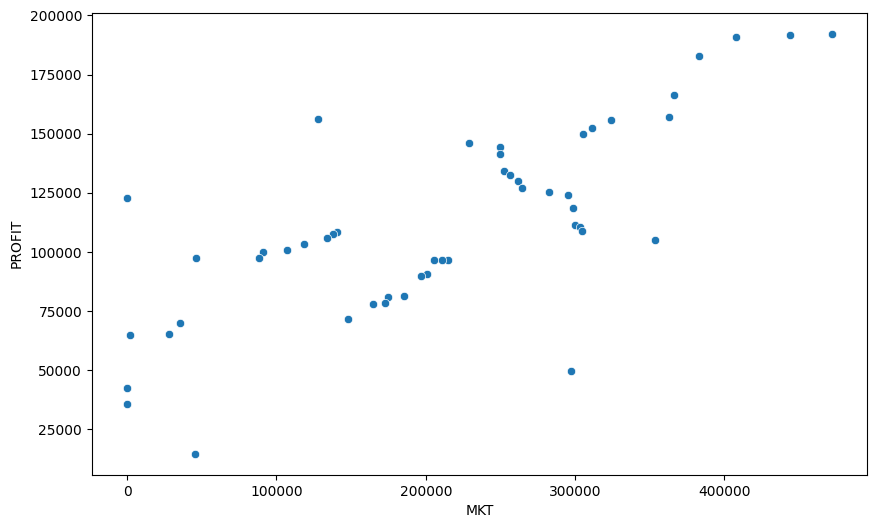

In [6]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['MKT'],y=df['PROFIT'])
plt.show()

In [8]:
x=df[['MKT','PROFIT']]

In [7]:
from sklearn.cluster  import KMeans,AgglomerativeClustering

In [9]:
wsse=[]
for i in range(1,16):
    km=KMeans(n_clusters=i,n_init=100)
    km.fit_predict(x)
    wsse.append(km.inertia_)
wsse

[812395905270.9149,
 272722279717.71713,
 160904404323.67426,
 83965904608.80215,
 60390407114.93709,
 46256408707.5204,
 37766083506.72558,
 32098037979.55033,
 27104974156.31739,
 23517656104.724953,
 19800221133.022163,
 16818226412.461441,
 14017542977.248135,
 11431983412.66045,
 9178762239.618135]

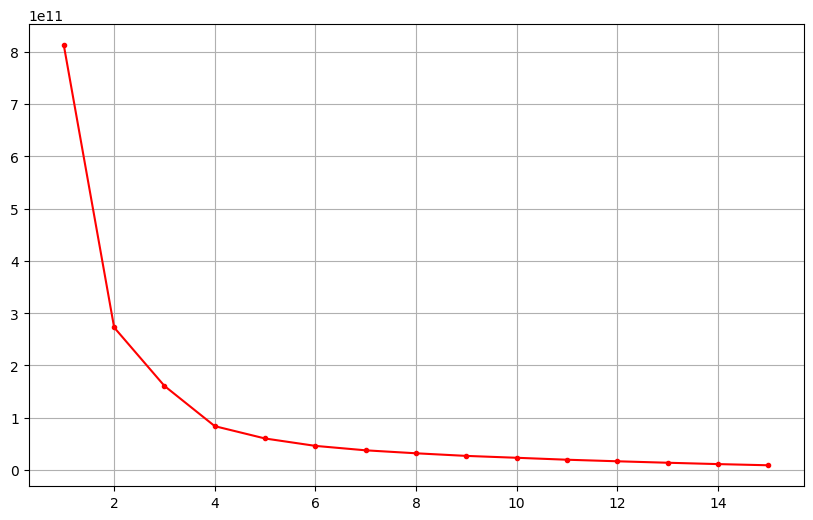

In [10]:
plt.figure(figsize=(10,6))
plt.plot(range(1,16),wsse,marker='.',color='r')
plt.grid()
plt.show()

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
silh=[]
for i in range(2,16):
    km=KMeans(n_clusters=i,n_init=100)
    labels=km.fit_predict(x)
    silh.append(silhouette_score(x,labels))
silh

[0.5500407127259926,
 0.49370434884888936,
 0.5264138167493533,
 0.5282365257635285,
 0.5054328017637747,
 0.5067391680288938,
 0.47639557070797983,
 0.474736409585597,
 0.46667036541499335,
 0.48686844688001396,
 0.4949114566190731,
 0.5015014108510395,
 0.5106831258253356,
 0.5242729498744353]

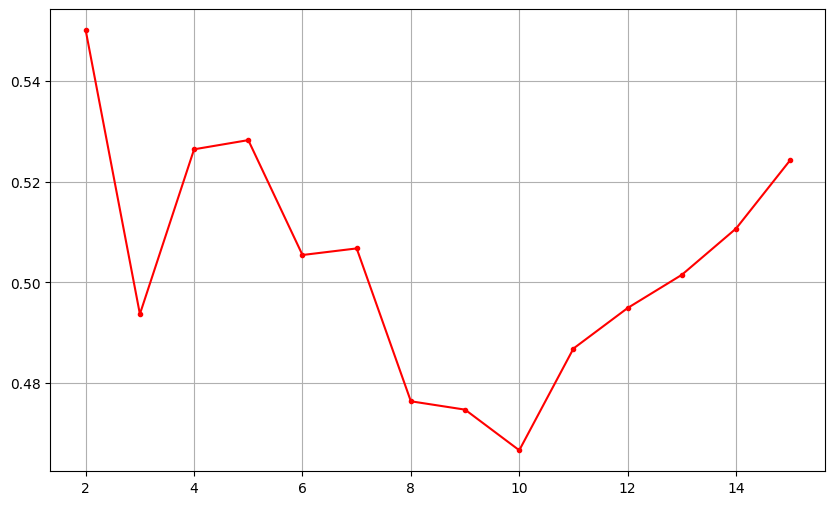

In [13]:
plt.figure(figsize=(10,6))
plt.plot(range(2,16),silh,marker='.',color='r')
plt.grid()
plt.show()

In [14]:
km=KMeans(n_clusters=4,n_init=100)
labels=km.fit_predict(x)
labels

array([2, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 3, 3, 3, 0, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 1, 0, 1, 1, 1])

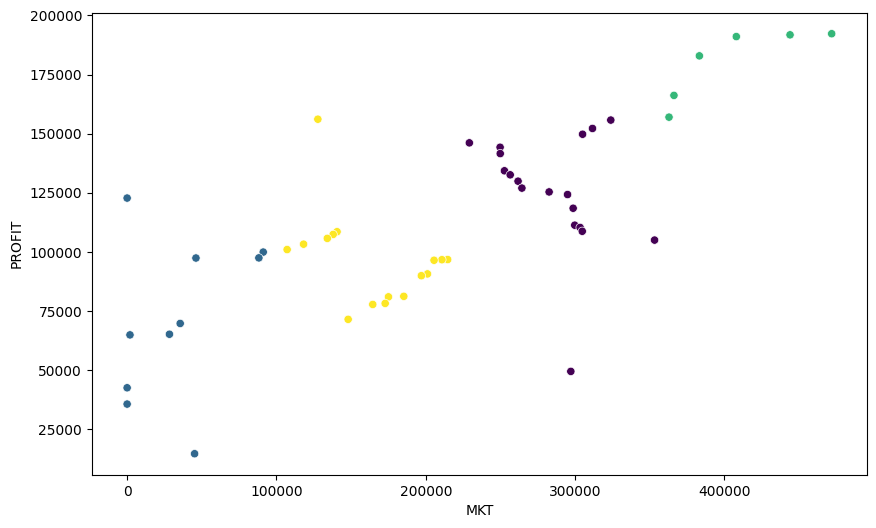

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['MKT'],y=df['PROFIT'],c=labels)
plt.show()

In [16]:
import scipy.cluster.hierarchy as sch

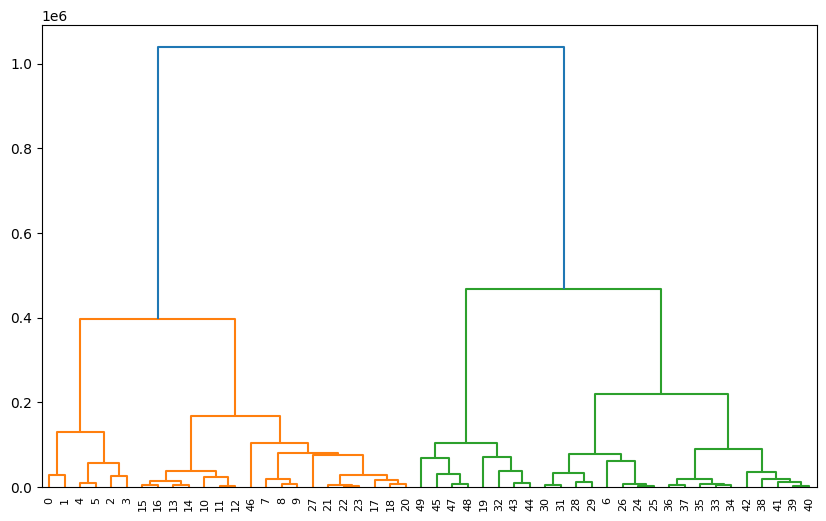

In [17]:
plt.figure(figsize=(10,6))
sch.dendrogram(sch.linkage(x,method='ward'))
plt.show()

In [19]:
ag=AgglomerativeClustering(n_clusters=4)
labels2=ag.fit_predict(x)
labels2

array([3, 3, 3, 3, 3, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 1, 2, 2, 2], dtype=int64)

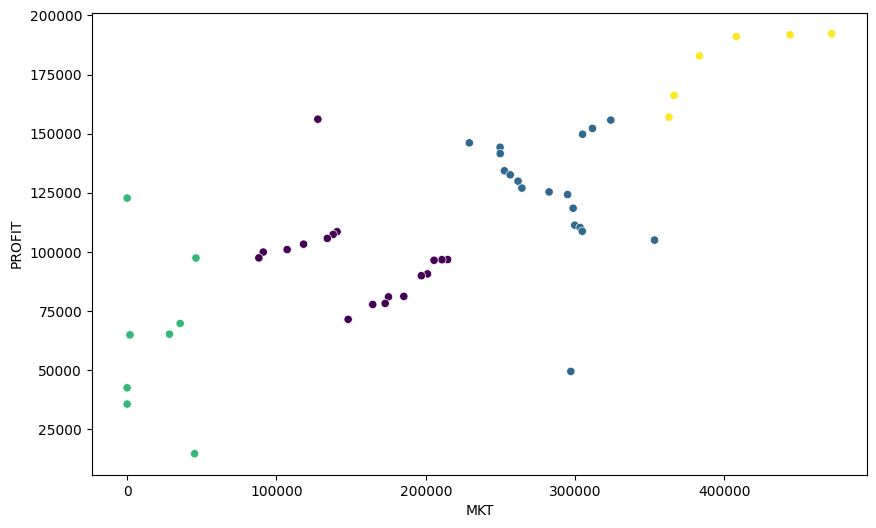

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['MKT'],y=df['PROFIT'],c=labels2)
plt.show()